In [103]:
import numpy as np
from numpy import linalg as LA

In [104]:
data = np.array([[2.5 ,2.4],
[0.5 ,0.7],
[2.2, 2.9],
[1.9, 2.2],
[3.1, 3.0],
[2.3, 2.7],
[2, 1.6],
[1, 1.1],
[1.5, 1.6],
[1.1, 0.9]])

In [105]:
data.shape

(10, 2)

In [106]:
dataAdjust = np.transpose(np.array([list(data[:,0] - np.mean(data[:,0])),list(data[:,1] - np.mean(data[:,1]))]))

In [107]:
dataAdjust

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [108]:
dataAdjust.shape

(10, 2)

In [109]:
import seaborn as sns

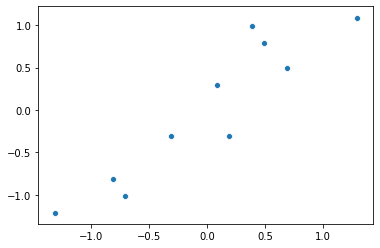

In [110]:
sns.scatterplot(dataAdjust[:,0],dataAdjust[:,1])

In [111]:
np.transpose(dataAdjust).shape

(2, 10)

In [112]:
dataCov = np.cov(np.transpose(dataAdjust))
dataCov

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [113]:
dataCov.shape

(2, 2)

In [114]:
eigVal,eigVec = LA.eig(dataCov)

In [115]:
eigVal

array([0.0490834 , 1.28402771])

In [116]:
eigVec

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [117]:
FeaVec = eigVec[:,1]
FeaVec

array([-0.6778734 , -0.73517866])

In [118]:
print(dataAdjust.shape,FeaVec.shape)

(10, 2) (2,)


In [119]:
np.transpose(FeaVec).shape

(2,)

In [120]:
np.transpose(dataAdjust).shape

(2, 10)

In [122]:
FinalData = np.matmul(np.transpose(FeaVec),np.transpose(dataAdjust))

In [123]:
FinalData.shape

(10,)

In [124]:
FinalData

array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

## Getting the old data back

<b> RowOriginalData = np.transpose(RowFeatureVector) * FinalData + OriginalMean </b>

In [125]:
FinalData = FinalData.reshape(1,10)

In [126]:
FinalData.shape

(1, 10)

In [127]:
FeaVec

array([-0.6778734 , -0.73517866])

In [128]:
FeaVec.shape

(2,)

In [129]:
transposeFeaVec = FeaVec.reshape(1,2)

In [130]:
transposeFeaVec.shape

(1, 2)

In [131]:
OriginalMean = np.mean(data[:,0])
OriginalMean

1.81

In [132]:
RowOriginalData = transposeFeaVec * np.transpose(FinalData) + OriginalMean

In [133]:
RowOriginalData

array([[2.37125896, 2.41870601],
       [0.60502558, 0.50316089],
       [2.48258429, 2.53944242],
       [1.99587995, 2.01159364],
       [2.9459812 , 3.04201343],
       [2.42886391, 2.48118069],
       [1.74281635, 1.73713686],
       [1.03412498, 0.96853498],
       [1.51306018, 1.48795783],
       [0.9804046 , 0.91027325]])